In [1]:
def f(x):
    return x**2 + 3*x + 5

In [2]:
x0=-5
x1=5
step=0.0001
xmin=x0
for i in range(0,int((x1-x0)/step)):
    x=x0+i*step
    if f(x)<f(xmin):
        xmin=x

print("Minimum bei x=",xmin," f an dieser Stelle ist=",f(xmin))

('Minimum bei x=', -1.5, ' f an dieser Stelle ist=', 2.75)


In [4]:
def mini(f,x0,x1,step):
    xmin=x0
    for i in range(0,int((x1-x0)/step)):
        x=x0+i*step
        if f(x)<f(xmin):
            xmin=x
    return xmin

In [5]:
from math import *
xmin=mini(cos,0,5,0.0001)
print("Minimum des cos bei x=",xmin,
      " cos dort ist=",cos(xmin))

('Minimum des cos bei x=', 3.1416, ' cos dort ist=', -0.9999999999730151)


### Approximation Ableitung


In [6]:
def abl1(f,x): # Approximation der ersten Ableitung
    h=0.000001
    return (f(x+h)-f(x))/h

def abl2(f,x): # Approximation der zweiten Ableitung
    h=0.000001
    return (abl1(f,x+h)-abl1(f,x))/h

def minipar(f,x0):
    while True:
        a=0.5*abl2(f,x0)
        b=abl1(f,x0)-x0*abl2(f,x0)
        c=0.5*(x0**2*abl2(f,x0)-2*x0*abl1(f,x0)+2*f(x0))
        x1=-b/(2*a)
        if abs(x1-x0)<0.0000001: 
            return x1
        x0=x1

In [7]:
minipar(cos,2)

3.141592153648217

In [8]:
def oberfl(r):
    return 1700/r+2*pi*r*r

In [9]:
minipar(oberfl, 1)

5.133493031442714

In [10]:
mini(oberfl, 1,10,0.001)

5.133

Stabile Variante

In [12]:
def miniparstabil(f,x0):
    while True:
        a=0.5*abl2(f,x0)
        if a<0.0001: # keine nach oben geoeffnete Parabel
            abl=abl1(f,x0)
            if abl>0: 
                x1=x0-0.01 # Schritt nach links
            else:
                if abl<0: 
                    x1=x0+0.01 # Schritt nach rechts
                else:
                    return x0
          
        else: # Normaler Iterationsschritt
            b=abl1(f,x0)-x0*abl2(f,x0)
            c=0.5*(x0**2*abl2(f,x0)-2*x0*abl1(f,x0)+2*f(x0))
            x1=-b/(2*a) # Das waere der neue Wert
            x1=x0+(x1-x0)*min(a,1) # Bei kleinem a
                                    # nicht so weit
        if abs(x1-x0)<0.0000001:
            return x1
        x0=x1

In [13]:
miniparstabil(cos,1)

3.1415920723535686

### Minimierung mit Klammerungen

In [14]:
def istKlammer(f,K):
    return f(K[0])>=f(K[1]) and f(K[1])<=f(K[2])

In [16]:
def verbessere(f,K):
    [a,b,c]=K
    if not(istKlammer(f,K)):
        print("!!!!!!!!!!!!, keine Klammer:",K)
    if istKlammer(f,[(a+b)/2.0,b,c]):
        [a,b,c]=[(a+b)/2.0,b,c]
    if istKlammer(f,[a,b,(c+b)/2.0]):
        [a,b,c]=[a,b,(c+b)/2.0]
    if istKlammer(f,[a,(a+b)/2.0,b]):
        [a,b,c]=[a,(a+b)/2.0,b]
    if istKlammer(f,[b,(b+c)/2.0,c]):
        [a,b,c]=[b,(b+c)/2.0,c]
    return [a,b,c]

In [17]:
def miniKlammer(f,K):
    while K[2]-K[0]>0.00000001:
        K1=verbessere(f,K)
        if K==K1 : 
            return K
        K=K1
    return K

In [19]:
print("miniKlammer:  startwert 1,2,5 : ",
        miniKlammer(cos,[1,2,5]))

('miniKlammer:  startwert 1,2,5 : ', [3.1415926534682512, 3.141592656262219, 3.1415926590561867])


In [20]:
def findeKlammer(f,x0):
    delta=0.01
    f0=f(x0)
    if f(x0+delta)<f0:
        a=x0
        b=x0+delta
        fb=f(b)
        for i in range(1,30):
            if f(b+2**i*delta)>fb:
                return [a,b,b+2**i*delta]
    if f(x0+delta)>f0:
        b=x0
        c=x0+delta
        fb=f(b)
        for i in range(1,30):
            if f(b-2**i*delta)>fb:
                return [b-2**i*delta,b,c]
    print("Keine Klammerung gefunden")
    return []


In [21]:
def miniK(f,x0):
    K=findeKlammer(f,x0)
    if K==[]: 
        return []
    else: 
        return miniKlammer(f,K)[1]

In [22]:
print("miniK cos :  startwert 1 : ", miniK(cos,2))

('miniK cos :  startwert 1 : ', 3.1415926527976987)


## Mehrdimensionale Minimierung I


In [24]:
def f(x,y):
    return sqrt((x-1)**2+(y-3)**2)+sqrt((x-5)**2+(y-2)**2)+sqrt((x-4)**2+(y-7)**2)

In [25]:
def f2test(A):
    return (A[0]-5)**2+(A[1]-7)**2

In [26]:
x0=[1,2] # Startwert
def fa(x):
    x0[0]=x
    return f2test(x0)

Das Problem des Fermatpunktes im Dreieck (kleinste Abstandssumme) kann damit gelöst werden.

In [27]:
def miniparN(f,x0): # x0 ist Liste der Startwerte
    n=len(x0)
    for k in range(50):
        for i in range(n):
            def fi(x): # wertet f aus mit ...
                #  ... xi neu eingesetzt
                x0[i]=x
                return f(x0)
            x0[i]=miniparstabil(fi,x0[i])
    return x0

In [28]:
print("Minimum von f2test: ", miniparN(f2test,[1,1]))

('Minimum von f2test: ', [4.9999995, 6.9999995])


### Mehrdimensionale Minimierung II

In [34]:
def grad(f,x0):
    g=[0]*len(x0) # Das wird der Gradient
    h=0.000001
    f0=f(x0)
    for i in range(len(x0)):
        x0[i]+=h # i-te Variable um h aendern
        g[i]=(f(x0)-f0)/h
        x0[i]+=-h  # i-te Variable zuruecksetzen
    return g

In [35]:
def muladd(a,s,b):  # a,b, sind Vektoren (d.h. Listen),
                      # s ist Parameter (eine Zahl)
    # berechnet a+s*b, also Punkt auf der Geraden durch a
    # mit Richtungsvektor b
    ergebnis=[0]*len(a)
    for i in range(len(a)):
        ergebnis[i]=a[i]+s*b[i]
    return ergebnis

In [36]:
def vbetrag(v): 
    return sqrt(sum([x**2 for x in v]))

In [37]:
def miniparNg(f,x0): # x0 ist Liste der Startwerte
    for k in range(50): # 50 Mal ...
        g=grad(f,x0)
        if vbetrag(g)<0.000001: 
            return x0
        if vbetrag(g)>10:
            for i in range(len(g)):
                g[i]=10*g[i]/vbetrag(g)
        def fr(s): # Funktion in Richtung g
            return f(muladd(x0,s,g))
        s_optimal=miniK(fr,0) # Hier koennte auch
                                # miniparstabil stehen
        if abs(s_optimal)<0.0001: 
            return x0
                 # Keine nennenswerte Aenderung
        x0=muladd(x0,s_optimal,g)
          # print("   x0=",x0,"g=",g)
    return x0


In [40]:
print("Minimum von f2test mit miniparNg: ",miniparNg(f2test,[1,1]))

('Minimum von f2test mit miniparNg: ', [4.9999996412611925, 6.999999413675006])


### Anwendungen der Minimierung

In [41]:
grad=pi/180

In [43]:
daten=[[0*grad,400],[10*grad,370],[20*grad,360],[45*grad,300],
  [60*grad,200],[80*grad,80]]


In [44]:
daten

[[0.0, 400],
 [0.17453292519943295, 370],
 [0.3490658503988659, 360],
 [0.7853981633974483, 300],
 [1.0471975511965976, 200],
 [1.3962634015954636, 80]]

In [45]:
def fModell(parameter,x):
    [a,b]=parameter
    return a*cos(x)+b

In [46]:
def QS(parameter):
    return sum([(fModell(parameter,x)-y)**2
                        for [x,y] in daten])

In [47]:
miniparN(QS,[1,1])

[370.8930149653193, 18.86847771263521]

In [48]:
daten=[[3,1],[2,2],[1,3],[0,3],[-1,-2],[0,-2]]

In [49]:
def f(arg):
    [xm,ym,r]=arg
    return sum([((x-xm)**2+(y-ym)**2-r**2)**2
                       for [x,y] in daten])

In [50]:
miniparN(f,[0,0,0])

[0.2856105901701386, 0.4135170076355178, 2.598849962891953]

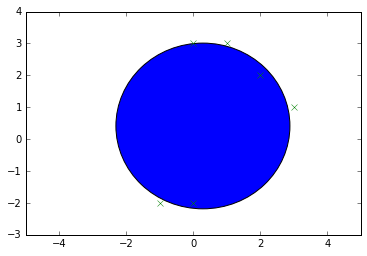

[[3, 1], [2, 2], [1, 3], [0, 3], [-1, -2], [0, -2]]

In [83]:
%matplotlib inline
from matplotlib.pyplot import *
from math import *
import numpy as np

x = []
y = []

for w in daten:
    x.append(w[0])
    y.append(w[1])

plot(x,y,'gx')
p=miniparN(f,[0,0,0])

c1 = Circle((p[0],p[1]),p[2])
gca().add_artist(c1)
axis([-5,5,-3,4])
show()
daten

In [54]:
def Zeit(xi,yi): # xi,yi sind Listen der Art xi=[x1,x2,...]
# Ergebnis ist Gesamtzeit, wenn
# Anfangsgeschwindigkeit =0
    t=0.0
    g=9.81  # Erdbeschleunigung
    for i in range(len(xi)-1):
        [xa,xb]=xi[i:i+2]
        [ya,yb]=yi[i:i+2]
        y=(ya+yb)/2 # Mittlere Hoehe
        v=sqrt(2*9.81*(yi[0]-y)) # aus 1/2*m*v^2=m*g*h
        strecke=sqrt((xa-xb)**2+(ya-yb)**2)
        t+=strecke/v
    return t

In [57]:
def Brachsito(P,Q,n): # P,Q sind Startkoordinaten
      # Anfangsweg: Lineare Rutschbahn:
    xi=[P[0]]
    yi=[P[1]]
    for i in range(n):
        xi.append(P[0]+(Q[0]-P[0])/ n*(i+0.5))
        yi.append(P[1]+(Q[1]-P[1])/n*(i+0.5))
    xi.append(Q[0])
    yi.append(Q[1])
    def f(Yinnen): 
        return Zeit(xi,[yi[0]]+Yinnen+[yi[-1]]) 
    yi=[yi[0]]+miniparNg(f,yi[1:-1])+[yi[-1]]
    return zip(xi,yi)
    
    
    

In [59]:
def grad(f,x0):
    g=[0]*len(x0) # Das wird der Gradient
    h=0.000001
    f0=f(x0)
    for i in range(len(x0)):
        x0[i]+=h # i-te Variable um h aendern
        g[i]=(f(x0)-f0)/h
        x0[i]+=-h  # i-te Variable zuruecksetzen
    return g

In [60]:
print(Brachsito([-8,8],[8,-3],10))

[(-8, 8), (-7.5, 1.914227060269741), (-6.5, 0.9710763924447231), (-5.5, 0.13769880656404407), (-4.5, -0.5977471135384941), (-3.5, -1.2333909087268504), (-2.5, -1.7829818682620227), (-1.5, -2.220196897919055), (-0.5, -2.5991206216399623), (0.5, -2.8513212814944664), (1.5, -3.059236647041015), (8, -3)]


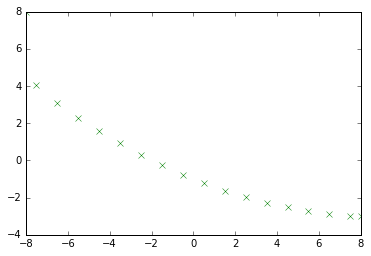

In [67]:
%matplotlib inline
from matplotlib.pyplot import *
from math import *
import numpy as np

x = []
y = []

for w in Brachsito([-8,8],[8,-3],16):
    x.append(w[0])
    y.append(w[1])


plot(x,y,'gx')
show()